<a href="https://colab.research.google.com/github/ashish1610dhiman/pinn_option_pricing/blob/main/add_spot_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install yfinance

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 8.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138938 sha256=14d75d8b5c1fe25e7e12d9ed5937d1f1a6902769de14c263ec155bd2c7932599
  Stored in directory: c:\users\rujul\appdata\loc

    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^


In [2]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
ndx_data = yf.download("NDX", start='2021-06-14', end='2022-06-28')
ndx_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-14,14128.200195,14128.200195,14128.200195,14128.200195,14128.200195,0
2021-06-15,14030.410156,14030.410156,14030.410156,14030.410156,14030.410156,0
2021-06-16,13983.009766,13983.009766,13983.009766,13983.009766,13983.009766,0
2021-06-17,14163.809570,14163.809570,14163.809570,14163.809570,14163.809570,0
2021-06-18,14049.580078,14049.580078,14049.580078,14049.580078,14049.580078,0


In [5]:
ndx_call_data = pd.read_csv("df_eur_call_NDX.csv")
ndx_call_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-14,14988.419922,15206.259766,14972.009766,15205.589844,15205.589844,4272020000
1,2023-08-15,15172.080078,15192.879883,15014.360352,15037.650391,15037.650391,4473320000
2,2023-08-16,15021.629883,15077.049805,14874.019531,14876.469727,14876.469727,6243760000
3,2023-08-17,14943.339844,14949.580078,14698.290039,14715.809570,14715.809570,5280180000
4,2023-08-18,14589.709961,14744.570313,14557.830078,14694.839844,14694.839844,4801910000


In [6]:
ndx_data.reset_index().dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
ndx_call_data["Date"]=pd.to_datetime(ndx_call_data["Date"])

In [12]:
ndx_call1 = ndx_call_data.merge(ndx_data.reset_index(),left_on="Date",right_on="Date",suffixes=("","_NDX"))
ndx_call1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_NDX,High_NDX,Low_NDX,Close_NDX,Adj Close_NDX,Volume_NDX


In [15]:
call_data = ndx_call1[["Date","Open","High","Low","Close","Adj Close","Volume"]]
call_data["Close"] = call_data["Close"]/1000
call_data["Open"] = (call_data["High"]+call_data["Low"])/2
call_data = call_data.rename(columns={"Adj Close":"spot_price"})
call_data.head()

,Date,Open,High,Low,Close,spot_price,Volume


In [16]:
call_data.mean()

C:\Users\Rujul\AppData\Local\Temp\ipykernel_11244\3834201902.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  call_data.mean()


Open         NaN
High         NaN
Low          NaN
Close        NaN
spot_price   NaN
Volume       NaN
dtype: float64

Text(0.5, 1.0, 'NDX Spot Price and European Call price')

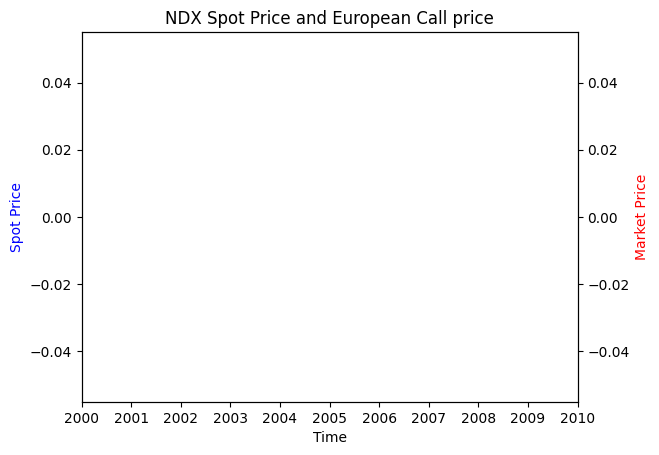

In [19]:
fig, ax1 = plt.subplots()
# Plot the "Spot Price" on the left axis
ax1.plot(call_data["Date"], call_data["spot_price"], label="Spot Price", color="blue")
ax1.set_xlabel('Time')
ax1.set_ylabel('Spot Price', color="blue")
ax2 = ax1.twinx()
# ax1.legend(
# Plot the "Market Price" on the right axis
ax2.plot(call_data["Date"], call_data["Close"], label="Market Price", color="red")
ax2.set_ylabel('Market Price', color="red")
plt.title("NDX Spot Price and European Call price")
# ax2.legend()

In [20]:
call_data.to_csv("NDX_call_data.csv")

In [21]:
call_data.std()

Date          NaT
Open          NaN
High          NaN
Low           NaN
Close         NaN
spot_price    NaN
Volume        NaN
dtype: object